In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
stars = pd.read_csv('stars.csv')

In [50]:
stars.columns

Index(['objid', 'u', 'g', 'r', 'i', 'z', 'class', 'elodieSpType', 'elodieTEff',
       'elodieBV', 'elodielogG', 'elodieFeH', 'psfFlux_u', 'psfFlux_g',
       'psfFlux_r', 'psfFlux_i', 'psfFlux_z', 'redshift'],
      dtype='object')

In [51]:
stars = stars.rename(columns = {'elodieTEff': 'Temperatura', 'elodieSpType': 'Tipo_espectral', 'elodieBV':'Indice_B-V', 'elodielogG':'logG', 'elodieFeH':'Metalicidad', 'psfFlux_u':'Flujo_u', 'psfFlux_g':'Flujo_g', 'psfFlux_r':'Flujo_r', 'psfFlux_i':'Flujo_i', 'psfFlux_z':'Flujo_z'})

In [52]:
stars.describe()

,objid,u,g,r,i,z,Temperatura,Indice_B-V,logG,Metalicidad,Flujo_u,Flujo_g,Flujo_r,Flujo_i,Flujo_z,redshift
count,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,1.237659e+18,20.678930,19.159274,18.530686,17.901468,17.659366,5305.831712,0.807179,3.755016,-0.552096,3.024804e+01,95.672248,171.814521,219.909824,242.674171,-0.000082
std,4.793256e+12,86.227705,80.176651,72.267388,82.625762,82.624071,1488.120030,0.504546,1.121005,0.846709,2.832369e+03,1301.573827,2636.857534,3583.141370,3199.743822,0.000446
min,1.237646e+18,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,3690.000000,-0.199000,0.000000,-2.720000,-7.401523e+00,-10.962980,-11.088250,-11.849180,-5.459770,-0.004329
25%,1.237655e+18,19.587307,18.161793,17.496637,17.145857,16.935460,3980.000000,0.456000,2.740000,-1.050000,4.738077e-01,2.579106,4.614623,7.994491,11.276632,-0.000232
50%,1.237661e+18,21.472095,19.886395,19.128290,18.658450,18.316075,5126.000000,0.709000,4.240000,-0.270000,2.549041e+00,10.712490,21.509660,33.059400,44.926075,-0.000057
75%,1.237663e+18,23.253285,21.412700,20.725045,20.136672,19.796145,5961.000000,1.363000,4.500000,-0.010000,1.444244e+01,53.191550,97.494858,134.769600,164.151875,0.000080
max,1.237668e+18,32.118950,31.037190,31.981080,31.468180,30.846780,13582.000000,1.787000,5.080000,1.350000,1.991043e+06,198487.600000,416880.100000,902789.400000,881392.100000,0.004563


In [53]:
stars = stars.drop(stars[stars['u'] < -30].index)
stars = stars.drop(stars[stars['g'] < -30].index)
stars = stars.drop(stars[stars['r'] < -30].index)
stars = stars.drop(stars[stars['i'] < -30].index)
stars = stars.drop(stars[stars['z'] < -30].index)

In [54]:
stars['Tipo_espectral'].unique()

array(['O9.5Ib...', 'M1V', 'O9.5Vvar', 'M2V', '0', 'F8V-VI', 'G5', 'K3V',
       'K2', 'K1V', 'G5Vp', 'F8', 'G9V', 'F7IV', 'G2IV', 'Fw', 'G8II-III',
       'K0', 'K5', 'A2', 'M0V', 'M2Vvar', 'A0spe...', 'M0III', 'F5V',
       'A0p...', 'G2V', 'G0', 'K7V', 'G0Vm', 'F4V', 'K0II-IIIva', 'F8IV',
       'A4p', 'F0', 'K2III', 'K5V', 'G5V', 'F5', 'F7V-VI', 'G3V', 'O8',
       'G0V', 'A5', 'sdG2', 'G5III', 'G8p...', 'K3III', 'K5III', 'G0Vwe',
       'B5', 'K2V', 'G8V', 'G6V', 'G8IV-V', 'K0V', 'F9V', 'F6IVwvar',
       'G8III-IV', 'G8III', 'K8V', 'K0IV', 'G7V', 'K4IIIp', 'K', 'F7Vm',
       'G5IV:w...', 'A0', 'F3V', 'K4III', 'B9III', 'F8V', 'G8III/IVw',
       'B8IIIp', 'M3V', 'sdF8', 'G1V', 'F7V', 'F2V', 'A9Vn', 'F2III',
       'S...', 'G5III...', 'A1V', 'G8IV', 'G8Vp', 'K5IV', 'G0II', 'G3IV',
       'F0III:n', 'G5IIIwe', 'F3Vwvar', 'B6V', 'A3spe...', 'G0Ib...',
       'F7/F8IV/V', 'F0III', 'B9V', 'G0V...', 'F6IV:', 'F2', 'G4V',
       'F8III', 'K3Vvar', 'K2Ibvar', 'F8:w', 'B9', 'K1V...', 'F0p

In [55]:
stars['Clase_espectral'] = stars['Tipo_espectral']

In [56]:
stars = stars[stars['Clase_espectral'] != '0']
stars = stars[stars['Clase_espectral'] != '1']
stars = stars[stars['Clase_espectral'] != '2']
stars = stars[stars['Clase_espectral'] != '3']
stars = stars[stars['Clase_espectral'] != '4']
stars = stars[stars['Clase_espectral'] != '5']
stars = stars[stars['Clase_espectral'] != '6']

In [57]:
stars['Clase_espectral'] = stars['Clase_espectral'].replace(stars[stars['Clase_espectral'].str.startswith('O')]['Clase_espectral'].unique(), '6')
stars['Clase_espectral'] = stars['Clase_espectral'].replace(stars[stars['Clase_espectral'].str.startswith('B')]['Clase_espectral'].unique(), '5')
stars['Clase_espectral'] = stars['Clase_espectral'].replace(stars[stars['Clase_espectral'].str.startswith('A')]['Clase_espectral'].unique(), '4')
stars['Clase_espectral'] = stars['Clase_espectral'].replace(stars[stars['Clase_espectral'].str.startswith('F')]['Clase_espectral'].unique(), '3')
stars['Clase_espectral'] = stars['Clase_espectral'].replace(stars[stars['Clase_espectral'].str.startswith('G')]['Clase_espectral'].unique(), '2')
stars['Clase_espectral'] = stars['Clase_espectral'].replace(stars[stars['Clase_espectral'].str.startswith('K')]['Clase_espectral'].unique(), '1')
stars['Clase_espectral'] = stars['Clase_espectral'].replace(stars[stars['Clase_espectral'].str.startswith('M')]['Clase_espectral'].unique(), '0')

In [58]:
stars = stars[stars['Tipo_espectral'] != 'sdG2']
stars = stars[stars['Tipo_espectral'] != 'sdF8']
stars = stars[stars['Tipo_espectral'] != 'S...']
stars = stars[stars['Tipo_espectral'] != 'sdF3']

In [59]:
stars['Clase_luminosidad'] = stars['Tipo_espectral']

In [60]:
stars['Clase_luminosidad'].unique()

array(['O9.5Ib...', 'M1V', 'O9.5Vvar', 'M2V', 'F8V-VI', 'G5', 'K3V', 'K2',
       'K1V', 'G5Vp', 'F8', 'G9V', 'F7IV', 'G2IV', 'Fw', 'G8II-III', 'K0',
       'K5', 'A2', 'M0V', 'M2Vvar', 'A0spe...', 'M0III', 'F5V', 'A0p...',
       'G2V', 'G0', 'K7V', 'G0Vm', 'F4V', 'K0II-IIIva', 'F8IV', 'A4p',
       'F0', 'K2III', 'K5V', 'G5V', 'F5', 'F7V-VI', 'G3V', 'O8', 'G0V',
       'A5', 'G5III', 'G8p...', 'K3III', 'K5III', 'G0Vwe', 'B5', 'K2V',
       'G8V', 'G6V', 'G8IV-V', 'K0V', 'F9V', 'F6IVwvar', 'G8III-IV',
       'G8III', 'K8V', 'K0IV', 'G7V', 'K4IIIp', 'K', 'F7Vm', 'G5IV:w...',
       'A0', 'F3V', 'K4III', 'B9III', 'F8V', 'G8III/IVw', 'B8IIIp', 'M3V',
       'G1V', 'F7V', 'F2V', 'A9Vn', 'F2III', 'G5III...', 'A1V', 'G8IV',
       'G8Vp', 'K5IV', 'G0II', 'G3IV', 'F0III:n', 'G5IIIwe', 'F3Vwvar',
       'B6V', 'A3spe...', 'G0Ib...', 'F7/F8IV/V', 'F0III', 'B9V',
       'G0V...', 'F6IV:', 'F2', 'G4V', 'F8III', 'K3Vvar', 'K2Ibvar',
       'F8:w', 'B9', 'K1V...', 'F0p', 'K1III', 'G8/K0IIIw.', 'K2

In [61]:
stars = stars.drop(stars[stars['Clase_luminosidad'].str.contains('/')].index)
stars = stars.drop(stars[stars['Clase_luminosidad'].str.contains(':')].index)
stars = stars.drop(stars[stars['Clase_luminosidad'].str.contains('w')].index)
stars = stars.drop(stars[stars['Clase_luminosidad'].str.contains('e')].index)
stars = stars.drop(stars[stars['Clase_luminosidad'].str.contains('m')].index)
stars = stars.drop(stars[stars['Clase_luminosidad'].str.contains('r')].index)
stars = stars.drop(stars[stars['Clase_luminosidad'].str.contains("\+")].index)
stars = stars.drop(stars[stars['Clase_luminosidad'].str.contains('n')].index)
stars = stars.drop(stars[stars['Clase_luminosidad'].str.contains('s')].index)
stars = stars.drop(stars[stars['Clase_luminosidad'].str.contains('\.')].index)
stars = stars.drop(stars[stars['Clase_luminosidad'].str.contains('v')].index)
stars = stars.drop(stars[stars['Clase_luminosidad'].str.contains('p')].index)
stars['Clase_luminosidad'] = (stars['Clase_luminosidad'].str.replace("[ab]",""))

<ipython-input-61-b734eb629caf>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  stars['Clase_luminosidad'] = (stars['Clase_luminosidad'].str.replace("[ab]",""))


In [62]:
stars['Clase_luminosidad'] = stars['Clase_luminosidad'].replace(stars[stars['Clase_luminosidad'].str.endswith('III')]['Clase_luminosidad'].unique(), '2')
stars['Clase_luminosidad'] = stars['Clase_luminosidad'].replace(stars[stars['Clase_luminosidad'].str.endswith('VII')]['Clase_luminosidad'].unique(), '6')
stars['Clase_luminosidad'] = stars['Clase_luminosidad'].replace(stars[stars['Clase_luminosidad'].str.endswith('II')]['Clase_luminosidad'].unique(), '1')
stars['Clase_luminosidad'] = stars['Clase_luminosidad'].replace(stars[stars['Clase_luminosidad'].str.endswith('IV')]['Clase_luminosidad'].unique(), '3')
stars['Clase_luminosidad'] = stars['Clase_luminosidad'].replace(stars[stars['Clase_luminosidad'].str.endswith('VI')]['Clase_luminosidad'].unique(), '5')
stars['Clase_luminosidad'] = stars['Clase_luminosidad'].replace(stars[stars['Clase_luminosidad'].str.endswith('V')]['Clase_luminosidad'].unique(), '4')
stars['Clase_luminosidad'] = stars['Clase_luminosidad'].replace(stars[stars['Clase_luminosidad'].str.endswith('I')]['Clase_luminosidad'].unique(), '0')


In [63]:
stars = stars[(stars['Clase_luminosidad'] == '0') | (stars['Clase_luminosidad'] == '1') | (stars['Clase_luminosidad'] == '2') |
          (stars['Clase_luminosidad'] == '3') | (stars['Clase_luminosidad'] == '4') | (stars['Clase_luminosidad'] == '5') | (stars['Clase_luminosidad'] == '6')]

In [64]:
stars['Clase_espectral'] = stars['Clase_espectral'].astype(float)
stars['Clase_luminosidad'] = stars['Clase_luminosidad'].astype(float)
stars.dtypes

objid                  int64
u                    float64
g                    float64
r                    float64
i                    float64
z                    float64
class                 object
Tipo_espectral        object
Temperatura            int64
Indice_B-V           float64
logG                 float64
Metalicidad          float64
Flujo_u              float64
Flujo_g              float64
Flujo_r              float64
Flujo_i              float64
Flujo_z              float64
redshift             float64
Clase_espectral      float64
Clase_luminosidad    float64
dtype: object

In [65]:
stars['Mag_absoluta_u'] = stars['u'] - 5*np.log10((4282749e6)*stars['redshift']) + 5
stars['Mag_absoluta_g'] = stars['g'] - 5*np.log10((4282749e6)*stars['redshift']) + 5
stars['Mag_absoluta_r'] = stars['r'] - 5*np.log10((4282749e6)*stars['redshift']) + 5
stars['Mag_absoluta_i'] = stars['i'] - 5*np.log10((4282749e6)*stars['redshift']) + 5
stars['Mag_absoluta_z'] = stars['z'] - 5*np.log10((4282749e6)*stars['redshift']) + 5

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
stars= stars.dropna()

In [66]:
stars

,objid,u,g,r,i,z,class,Tipo_espectral,Temperatura,Indice_B-V,...,Flujo_i,Flujo_z,redshift,Clase_espectral,Clase_luminosidad,Mag_absoluta_u,Mag_absoluta_g,Mag_absoluta_r,Mag_absoluta_i,Mag_absoluta_z
1,1237645943978590282,18.52349,17.48975,16.90494,16.73441,16.59008,STAR,M1V,3705,1.474,...,202.740500,224.791200,-0.000770,0.0,4.0,NaN,NaN,NaN,NaN,NaN
10,1237645943978786823,20.69578,19.55765,19.17546,19.02162,18.96332,STAR,M2V,3717,1.502,...,24.739150,25.793140,0.000420,0.0,4.0,-20.580144,-21.718274,-22.100464,-22.254304,-22.312604
20,1237646585563709988,20.62891,19.26565,18.64932,18.39598,18.23303,STAR,F8V-VI,5966,0.450,...,43.615130,50.999190,0.000110,3.0,5.0,-17.732003,-19.095263,-19.711593,-19.964933,-20.127883
22,1237646586100319052,23.27192,20.30992,19.26506,18.84688,18.54066,STAR,K3V,4528,1.038,...,28.775030,38.102000,0.000136,1.0,4.0,-15.560045,-18.522045,-19.566905,-19.985085,-20.291305
24,1237646586100383893,23.39468,21.56377,20.40743,21.98289,20.27488,STAR,K1V,5099,0.864,...,2.175225,7.987575,0.000130,1.0,4.0,-15.336091,-17.167001,-18.323341,-16.747881,-18.455891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499989,1237665566083187058,19.57921,18.09712,17.46786,17.24012,17.08909,STAR,K1V,5059,0.811,...,82.879320,102.370300,-0.000018,1.0,4.0,NaN,NaN,NaN,NaN,NaN
499993,1237665566084039693,24.92388,22.99961,21.41922,19.32010,18.23838,STAR,M2V,3717,1.502,...,17.992800,48.421130,-0.000100,0.0,4.0,NaN,NaN,NaN,NaN,NaN
499994,1237665566084104398,24.63506,23.04958,24.80205,20.09673,19.23389,STAR,M0V,3858,1.410,...,9.390087,20.719550,-0.000005,0.0,4.0,NaN,NaN,NaN,NaN,NaN
499997,1237665566603739308,20.75101,19.82720,19.47051,19.33513,19.28905,STAR,M2V,3717,1.502,...,18.573610,19.572810,0.000134,0.0,4.0,-18.043437,-18.967247,-19.323937,-19.459317,-19.505397


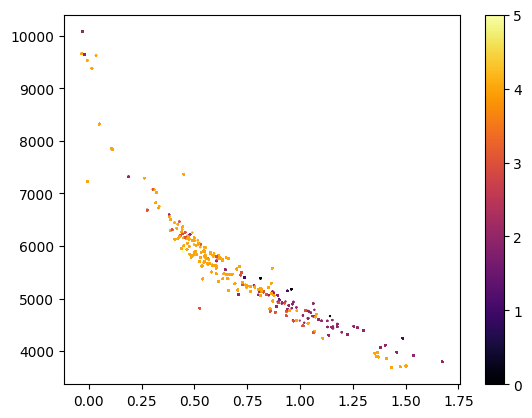

In [ ]:
plt.scatter(stars['Indice_B-V'], stars['Temperatura'], c = stars['Clase_luminosidad'], cmap = 'inferno', marker='o', s=0.3)
cbar = plt.colorbar()

#plt.xlim(-4, 1000)

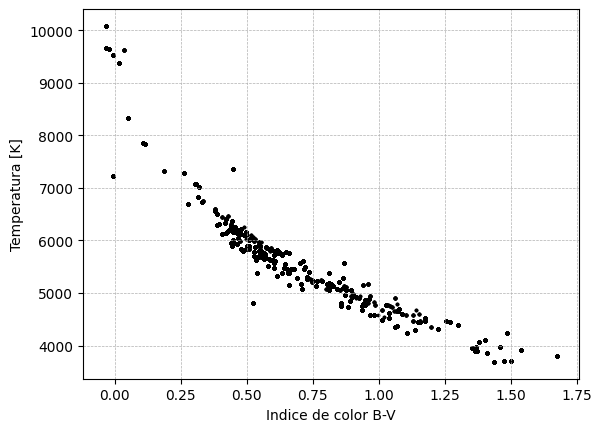

In [ ]:
plt.scatter(stars['Indice_B-V'], stars['Temperatura'], marker='o', c = 'black', s = 3)
#plt.gca().set_facecolor('black')
plt.xlabel('Indice de color B-V')
plt.ylabel('Temperatura [K]')
plt.grid(linestyle='--', linewidth=0.5)


<ipython-input-20-55bee10460e0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = stars.corr()


Text(0.5, 1.0, 'Matriz de Correlación')

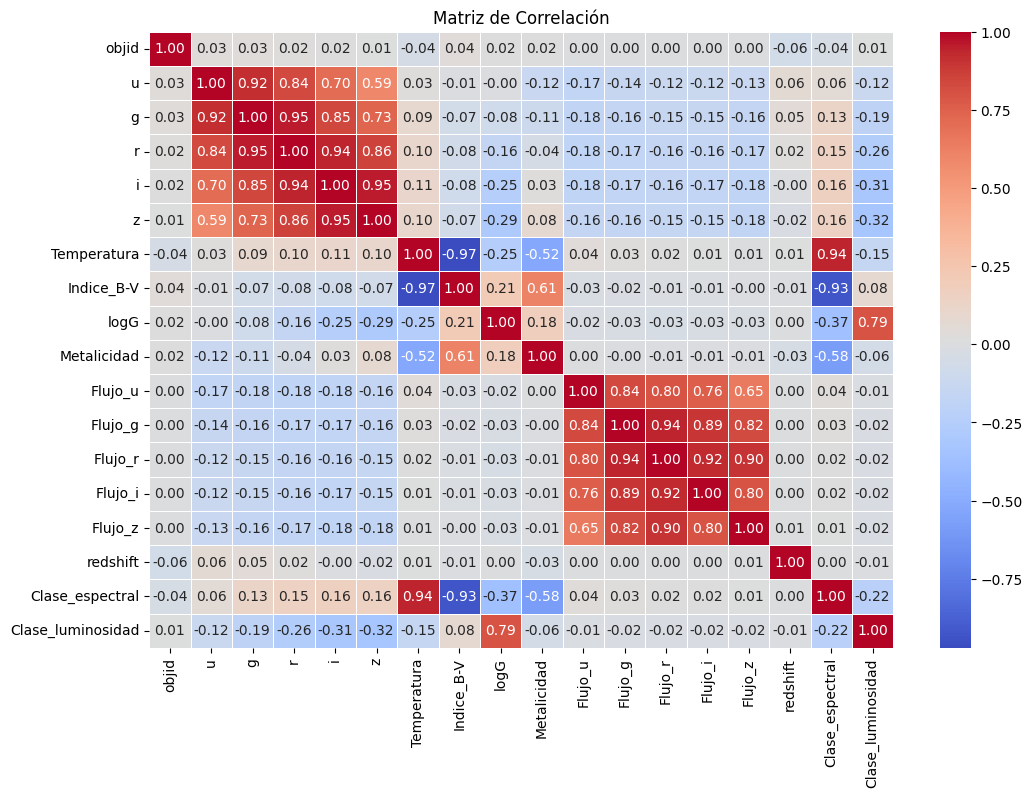

In [ ]:
correlation_matrix = stars.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')

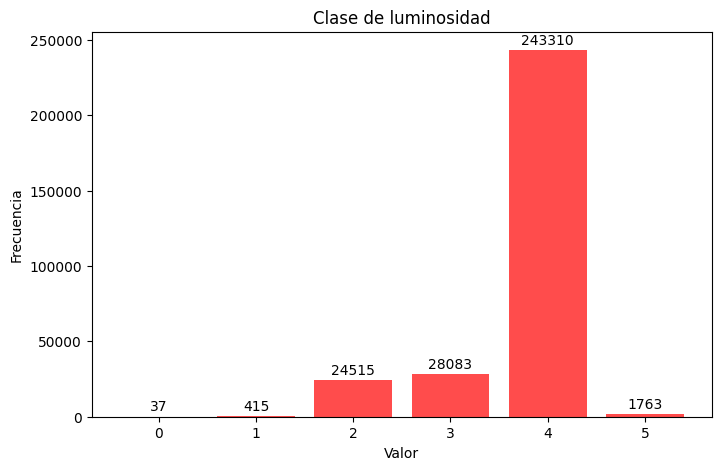

In [ ]:
conteo_valores = stars['Clase_luminosidad'].value_counts()
plt.figure(figsize=(8, 5))
bars = plt.bar(conteo_valores.index, conteo_valores.values, color='red', alpha=0.7)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.xticks(conteo_valores.index)
plt.title('Clase de luminosidad')

# Agregar los valores de los conteos arriba de las barras
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 2),  # 3 puntos de desplazamiento hacia arriba
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

In [ ]:
conteo_valores = stars['Clase_espectral'].value_counts()
plt.bar(conteo_valores.index, conteo_valores.values)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.xticks(conteo_valores.index)
plt.title('Clase espectral')
plt.show()

In [ ]:
stars['Clase_luminosidad'].value_counts()

4.0    243310
3.0     28083
2.0     24515
5.0      1763
1.0       415
0.0        37
Name: Clase_luminosidad, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

#REGRESIÓN LOGISTICA

In [80]:
stars

,objid,u,g,r,i,z,class,Tipo_espectral,Temperatura,Indice_B-V,...,Flujo_i,Flujo_z,redshift,Clase_espectral,Clase_luminosidad,Mag_absoluta_u,Mag_absoluta_g,Mag_absoluta_r,Mag_absoluta_i,Mag_absoluta_z
1,1237645943978590282,18.52349,17.48975,16.90494,16.73441,16.59008,STAR,M1V,3705,1.474,...,202.740500,224.791200,-0.000770,0.0,4.0,NaN,NaN,NaN,NaN,NaN
10,1237645943978786823,20.69578,19.55765,19.17546,19.02162,18.96332,STAR,M2V,3717,1.502,...,24.739150,25.793140,0.000420,0.0,4.0,-20.580144,-21.718274,-22.100464,-22.254304,-22.312604
20,1237646585563709988,20.62891,19.26565,18.64932,18.39598,18.23303,STAR,F8V-VI,5966,0.450,...,43.615130,50.999190,0.000110,3.0,5.0,-17.732003,-19.095263,-19.711593,-19.964933,-20.127883
22,1237646586100319052,23.27192,20.30992,19.26506,18.84688,18.54066,STAR,K3V,4528,1.038,...,28.775030,38.102000,0.000136,1.0,4.0,-15.560045,-18.522045,-19.566905,-19.985085,-20.291305
24,1237646586100383893,23.39468,21.56377,20.40743,21.98289,20.27488,STAR,K1V,5099,0.864,...,2.175225,7.987575,0.000130,1.0,4.0,-15.336091,-17.167001,-18.323341,-16.747881,-18.455891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499989,1237665566083187058,19.57921,18.09712,17.46786,17.24012,17.08909,STAR,K1V,5059,0.811,...,82.879320,102.370300,-0.000018,1.0,4.0,NaN,NaN,NaN,NaN,NaN
499993,1237665566084039693,24.92388,22.99961,21.41922,19.32010,18.23838,STAR,M2V,3717,1.502,...,17.992800,48.421130,-0.000100,0.0,4.0,NaN,NaN,NaN,NaN,NaN
499994,1237665566084104398,24.63506,23.04958,24.80205,20.09673,19.23389,STAR,M0V,3858,1.410,...,9.390087,20.719550,-0.000005,0.0,4.0,NaN,NaN,NaN,NaN,NaN
499997,1237665566603739308,20.75101,19.82720,19.47051,19.33513,19.28905,STAR,M2V,3717,1.502,...,18.573610,19.572810,0.000134,0.0,4.0,-18.043437,-18.967247,-19.323937,-19.459317,-19.505397


In [ ]:
#filas_valor_4 = stars.index[stars['Clase_luminosidad'] == 4.0].tolist()
## Seleccionar aleatoriamente 200,000 índices para eliminar
#indices_a_eliminar = np.random.choice(filas_valor_4, size=210000, replace=False)
#
## Eliminar las filas correspondientes a los índices seleccionados
#stars = stars.drop(indices_a_eliminar)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [81]:
# Separar las variables predictoras (X) y la variable objetivo (y)
#X = stars[['Temperatura', 'u', 'g', 'r', 'i', 'z']]
#X = stars[['Indice_B-V', 'Temperatura', 'logG', 'Metalicidad', 'u', 'g', 'r', 'i', 'z', 'redshift']]
#y = stars['Clase_espectral']

X = stars[['Indice_B-V', 'logG', 'Metalicidad']]
y = stars['Clase_luminosidad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify = y)

scalerX = StandardScaler()
scalerX.fit(X_train)

X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)

In [82]:
# Crear y entrenar el modelo de regresión logística multinomial
modelo = LogisticRegression(class_weight='balanced', multi_class='multinomial',
                            solver='lbfgs', max_iter=1000, )
modelo.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predicciones)
print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.7708382249354309


Text(0.5, 1.0, 'Matriz de Confusión')

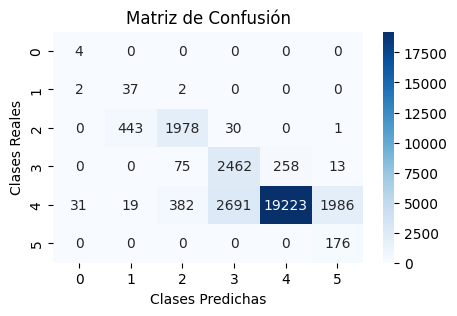

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, predicciones)


plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Reales")
plt.title("Matriz de Confusión")

#RANDOM FOREST

In [ ]:
stars

,objid,u,g,r,i,z,class,Tipo_espectral,Temperatura,Indice_B-V,logG,Metalicidad,Flujo_u,Flujo_g,Flujo_r,Flujo_i,Flujo_z,redshift,Clase_espectral,Clase_luminosidad
1,1237645943978590282,18.52349,17.48975,16.90494,16.73441,16.59008,STAR,M1V,3705,1.474,4.800,0.60,38.312450,99.506130,131.613600,202.740500,224.791200,-0.000770,0.0,4.0
10,1237645943978786823,20.69578,19.55765,19.17546,19.02162,18.96332,STAR,M2V,3717,1.502,4.890,-0.20,5.378482,15.082420,21.454570,24.739150,25.793140,0.000420,0.0,4.0
20,1237646585563709988,20.62891,19.26565,18.64932,18.39598,18.23303,STAR,F8V-VI,5966,0.450,4.210,-0.72,5.673612,19.779100,34.650970,43.615130,50.999190,0.000110,3.0,5.0
22,1237646586100319052,23.27192,20.30992,19.26506,18.84688,18.54066,STAR,K3V,4528,1.038,4.251,0.07,0.514192,7.523442,20.064230,28.775030,38.102000,0.000136,1.0,4.0
24,1237646586100383893,23.39468,21.56377,20.40743,21.98289,20.27488,STAR,K1V,5099,0.864,4.530,-0.07,0.453109,2.420383,7.098822,2.175225,7.987575,0.000130,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499989,1237665566083187058,19.57921,18.09712,17.46786,17.24012,17.08909,STAR,K1V,5059,0.811,4.450,-0.16,11.744350,42.724420,70.635540,82.879320,102.370300,-0.000018,1.0,4.0
499993,1237665566084039693,24.92388,22.99961,21.41922,19.32010,18.23838,STAR,M2V,3717,1.502,4.890,-0.20,-0.043226,0.607084,2.503237,17.992800,48.421130,-0.000100,0.0,4.0
499994,1237665566084104398,24.63506,23.04958,24.80205,20.09673,19.23389,STAR,M0V,3858,1.410,4.165,-0.06,0.000008,0.603433,0.000073,9.390087,20.719550,-0.000005,0.0,4.0
499997,1237665566603739308,20.75101,19.82720,19.47051,19.33513,19.28905,STAR,M2V,3717,1.502,4.890,-0.20,5.013982,11.872790,16.201630,18.573610,19.572810,0.000134,0.0,4.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [77]:
#X = stars[['Temperatura', 'u', 'g', 'r', 'i', 'z']]
#X = stars[['Indice_B-V', 'Temperatura', 'logG', 'Metalicidad', 'u', 'g', 'r', 'i', 'z', 'redshift']]
X = stars[[ 'logG']]
#y = stars['Clase_espectral']
y = stars['Clase_luminosidad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42, stratify = y)

In [78]:
# Crear el modelo Random Forest
modelo_rf = RandomForestClassifier(class_weight='balanced', n_estimators = 20, max_depth = None, min_samples_split = 2, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
modelo_rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones_rf = modelo_rf.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy_rf = accuracy_score(y_test, predicciones_rf)
print("Precisión del modelo Random Forest:", accuracy_rf)

# Otras métricas de evaluación
print(classification_report(y_test, predicciones_rf))

arboles = modelo_rf.estimators_

# Itera a través de los árboles y obtén la profundidad de cada uno
profundidades = [arbol.tree_.max_depth for arbol in arboles]

# Ahora, profundidades contiene la profundidad de cada árbol en el bosque
print(profundidades)

Precisión del modelo Random Forest: 0.9934884422995485
              precision    recall  f1-score   support

         0.0       0.08      1.00      0.15        30
         1.0       0.53      1.00      0.70       332
         2.0       1.00      0.98      0.99     19612
         3.0       0.98      0.99      0.99     22466
         4.0       1.00      0.99      1.00    194649
         5.0       0.77      1.00      0.87      1410

    accuracy                           0.99    238499
   macro avg       0.73      0.99      0.78    238499
weighted avg       1.00      0.99      0.99    238499

[12, 13, 13, 12, 12, 12, 13, 13, 13, 13, 12, 14, 13, 11, 11, 13, 14, 11, 13, 13]


Matriz de Confusión:


Text(0.5, 1.0, 'Matriz de Confusión')

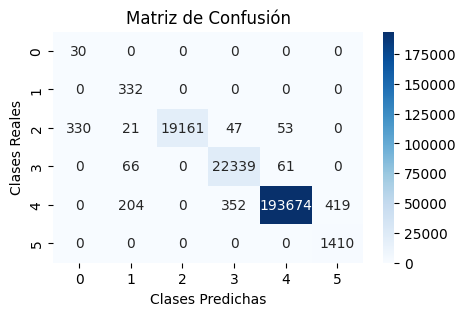

In [79]:
# Matriz de confusión
confusion_rf = confusion_matrix(y_test, predicciones_rf)
print("Matriz de Confusión:")
#print(confusion_rf)
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_rf, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Reales")
plt.title("Matriz de Confusión")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir los hiperparámetros y sus rangos
param_grid = {
    'n_estimators': [1, 5, 10, 15, 20],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Crear el modelo
modelo_rf = RandomForestClassifier(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(modelo_rf, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda en cuadrícula en los datos
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 20}


#SVM

In [ ]:
stars = stars.reset_index(drop=True)

In [ ]:
# Número de filas aleatorias que deseas eliminar
num_filas_a_eliminar = 275000

# Obtén el número total de filas en el DataFrame
num_filas_total = len(stars)

# Genera índices aleatorios para las filas que deseas eliminar
indices_a_eliminar = np.random.choice(num_filas_total, num_filas_a_eliminar, replace=False)

# Elimina las filas con los índices generados
stars = stars.drop(indices_a_eliminar)

In [ ]:
stars

,objid,u,g,r,i,z,class,Tipo_espectral,Temperatura,Indice_B-V,logG,Metalicidad,Flujo_u,Flujo_g,Flujo_r,Flujo_i,Flujo_z,redshift,Clase_espectral,Clase_luminosidad
0,1237645943978786823,20.69578,19.55765,19.17546,19.02162,18.96332,STAR,M2V,3717,1.502,4.890,-0.20,5.378482,15.082420,21.454570,24.739150,25.793140,0.000420,0.0,4.0
1,1237646586100383893,23.39468,21.56377,20.40743,21.98289,20.27488,STAR,K1V,5099,0.864,4.530,-0.07,0.453109,2.420383,7.098822,2.175225,7.987575,0.000130,1.0,4.0
2,1237646586103990437,23.61958,21.56446,19.79948,18.55701,17.80835,STAR,M2V,3717,1.502,4.890,-0.20,0.309642,2.354262,12.151630,38.438360,75.169910,0.000066,0.0,4.0
3,1237646791699399567,15.53489,14.60480,14.39718,14.32502,14.27550,STAR,M0III,3796,1.674,1.532,-0.27,593.713200,1424.550000,1763.830000,1890.979000,1992.191000,-0.000016,0.0,2.0
4,1237646707428295831,19.72306,17.05117,15.60270,14.89470,14.35347,STAR,F4V,7014,0.320,4.155,-0.09,12.707160,150.293100,558.514300,1093.271000,1803.962000,0.000262,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23118,1237666430439719366,20.17842,18.73944,18.18303,17.94277,17.80906,STAR,G8V,5285,0.692,4.620,-0.71,8.419115,31.930570,51.346350,65.832720,73.286910,-0.000011,2.0,4.0
23119,1237666430439588246,21.00568,19.35298,18.52986,18.16997,18.01746,STAR,K3V,4775,0.950,4.409,-0.12,4.130672,18.274890,39.154080,54.260990,61.661910,-0.000023,1.0,4.0
23120,1237666301092364542,19.30936,18.01321,17.48992,17.29882,17.21599,STAR,G6V,5474,0.603,4.160,-0.67,19.170610,62.686670,101.453900,119.820000,129.395800,0.000038,2.0,4.0
23121,1237666301092233390,24.46180,21.08307,19.57340,18.49175,17.89531,STAR,M2V,3717,1.502,4.890,-0.20,0.137322,3.674903,14.486410,40.032390,68.251050,0.000287,0.0,4.0


In [ ]:
stars = stars.reset_index(drop=True)

In [ ]:

# Separar las variables predictoras (X) y la variable objetivo (y)
#X = stars[['Temperatura', 'u', 'g', 'r', 'i', 'z']]
#X = stars[['Indice_B-V', 'Temperatura', 'logG', 'Metalicidad', 'u', 'g', 'r', 'i', 'z', 'redshift']]
X = stars[['Indice_B-V', 'Temperatura', 'logG', 'Metalicidad']]
#y = stars['Clase_espectral']
y = stars['Clase_luminosidad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

scalerX = StandardScaler()
scalerX.fit(X_train)

X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)

In [ ]:

modelo_svmLinear = SVC(kernel='linear', C = 1.0, class_weight='balanced')
modelo_svmLinear.fit(X_train_scaled, y_train)


predicciones = modelo_svmLinear.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predicciones)

print("Precisión del modelo SVM:", accuracy)
print(classification_report(y_test, predicciones))
print(confusion_matrix(y_test, predicciones))

In [ ]:
modelo_svmPoly = SVC(kernel='poly', degree=3, gamma="auto", C = 1.0, class_weight='balanced')
modelo_svmPoly.fit(X_train_scaled, y_train)


predicciones = modelo_svmPoly.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predicciones)

print("Precisión del modelo SVM:", accuracy)
print(classification_report(y_test, predicciones))
print(confusion_matrix(y_test, predicciones))

In [ ]:
modelo_svmrbf = SVC(kernel='rbf', gamma=0.5, C = 1.0, class_weight='balanced')
modelo_svmrbf.fit(X_train_scaled, y_train)


predicciones = modelo_svmrbf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predicciones)

print("Precisión del modelo SVM:", accuracy)
print(classification_report(y_test, predicciones))
print(confusion_matrix(y_test, predicciones))

Precisión del modelo SVM: 0.9933584905660378
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.92      1.00      0.96        83
         2.0       0.97      1.00      0.98      4903
         3.0       0.96      1.00      0.98      5617
         4.0       1.00      0.99      1.00     48662
         5.0       0.92      1.00      0.96       353

    accuracy                           0.99     59625
   macro avg       0.96      1.00      0.98     59625
weighted avg       0.99      0.99      0.99     59625

[[    7     0     0     0     0     0]
 [    0    83     0     0     0     0]
 [    0     7  4888     7     1     0]
 [    0     0     1  5610     6     0]
 [    0     0   144   200 48288    30]
 [    0     0     0     0     0   353]]


Matriz de Confusión:


Text(0.5, 1.0, 'Matriz de Confusión')

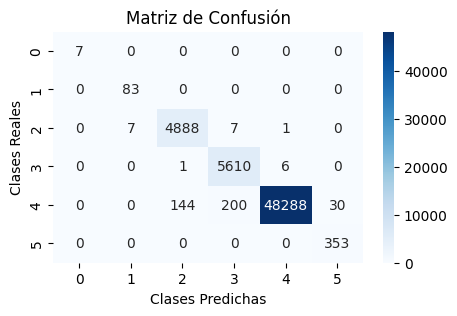

In [ ]:
# Matriz de confusión
confusion_svm = confusion_matrix(y_test, predicciones)
print("Matriz de Confusión:")
#print(confusion_rf)
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_svm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Reales")
plt.title("Matriz de Confusión")

In [ ]:
modelo_svmsigmoid = SVC(kernel='sigmoid', C = 1.0, class_weight='balanced')
modelo_svmsigmoid.fit(X_train_scaled, y_train)


predicciones = modelo_svmsigmoid.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predicciones)

print("Precisión del modelo SVM:", accuracy)
print(classification_report(y_test, predicciones))
print(confusion_matrix(y_test, predicciones))

In [ ]:
stars = stars.reset_index(drop=True)

In [ ]:
X

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define el número de divisiones (K) para la validación cruzada
n_splits = 5
kf = StratifiedKFold(n_splits = n_splits, shuffle=True, random_state=42)

Linear = SVC(kernel='linear', C = 1.0, class_weight='balanced')
Poly = SVC(kernel='poly', degree=3, gamma="auto", C = 1.0, class_weight='balanced')
rbf = SVC(kernel='rbf', gamma=0.5, C = 1.0, class_weight='balanced')
sigmoid = SVC(kernel='sigmoid', C = 1.0, class_weight='balanced')

accuracy_score_linear = []
accuracy_score_poly = []
accuracy_score_rbf = []
accuracy_score_sigmoid = []

# Ciclo para iterar sobre cada división de la validación cruzada
for train_index, test_index in kf.split(X, y):
  X_train, X_test = X.values[train_index, :], X.values[test_index, :]
  y_train, y_test = y[train_index], y[test_index]

  scalerX = StandardScaler()
  scalerX.fit(X_train)

  X_train_scaled = scalerX.transform(X_train)
  X_test_scaled = scalerX.transform(X_test)

  # Crea y entrena un modelo SVM
  Linear.fit(X_train_scaled, y_train)
  Poly.fit(X_train_scaled, y_train)
  rbf.fit(X_train_scaled, y_train)
  sigmoid.fit(X_train_scaled, y_train)

  # Realiza predicciones en el conjunto de prueba
  pred_Linear = Linear.predict(X_test_scaled)
  pred_Poly = Poly.predict(X_test_scaled)
  pred_rbf = rbf.predict(X_test_scaled)
  pred_sigmoid = Linear.predict(X_test_scaled)

  # Calcula la precisión en esta división y agrégala a la lista de puntajes
  accuracy_Linear = accuracy_score(pred_Linear, y_test)
  accuracy_score_linear.append(accuracy_Linear)

  accuracy_Poly = accuracy_score(pred_Poly, y_test)
  accuracy_score_poly.append(accuracy_Poly)

  accuracy_rbf = accuracy_score(pred_rbf, y_test)
  accuracy_score_rbf.append(accuracy_rbf)

  accuracy_sigmoid = accuracy_score(pred_sigmoid, y_test)
  accuracy_score_sigmoid.append(accuracy_sigmoid)

# Calcula el promedio de los puntajes de precisión para este kernel
avg_accuracy_linear = sum(accuracy_score_linear) / n_splits
avg_accuracy_poly = sum(accuracy_score_poly) / n_splits
avg_accuracy_rbf = sum(accuracy_score_rbf) / n_splits
avg_accuracy_sigmoid = sum(accuracy_score_sigmoid) / n_splits

print('accuracy of each fold in linear - {}'.format(accuracy_score_linear))
print('Avg linear accuracy : {}'.format(avg_accuracy_linear))

print('accuracy of each fold in poly - {}'.format(accuracy_score_poly))
print('Avg poly accuracy : {}'.format(avg_accuracy_poly))

print('accuracy of each fold in rbf - {}'.format(accuracy_score_rbf))
print('Avg rbf accuracy : {}'.format(avg_accuracy_rbf))

print('accuracy of each fold in sigmoid - {}'.format(accuracy_score_sigmoid))
print('Avg sigmoid accuracy : {}'.format(avg_accuracy_sigmoid))

accuracy of each fold in linear - [0.8713513513513513, 0.8702702702702703, 0.8741621621621621, 0.8648356401384083, 0.8726211072664359]
Avg linear accuracy : 0.8706481062377256
accuracy of each fold in poly - [0.9206486486486486, 0.9234594594594595, 0.9234594594594595, 0.9132785467128027, 0.9240916955017301]
Avg poly accuracy : 0.9209875619564201
accuracy of each fold in rbf - [0.9747027027027027, 0.9788108108108108, 0.9757837837837838, 0.9733996539792388, 0.9736159169550173]
Avg rbf accuracy : 0.9752625736463107
accuracy of each fold in sigmoid - [0.8713513513513513, 0.8702702702702703, 0.8741621621621621, 0.8648356401384083, 0.8726211072664359]
Avg sigmoid accuracy : 0.8706481062377256


In [ ]:
plt.scatter(stars['Temperatura'], stars['Mag_absoluta_u'], c = stars['Clase_luminosidad'], cmap = 'inferno', marker='o', s=0.3)
cbar = plt.colorbar()
#plt.xlim(-4, 1000)

In [ ]:
contador = stars['Clase_espectral'].loc[(stars['Clase_espectral'] == 1) & (stars['Clase_luminosidad'] == 'supergigante')].count()
print(contador)